In [130]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.rcParams["figure.figsize"] = (12, 8) # (w, h)

import torch
import torch.nn as nn
import torch.nn.functional as F

# Data: inputs x (scalar real values), target outputs y
# Lets imagine that our actual model has the following parameters:
w2_real = 1
w1_real = 2
b_real = 3
x_data = [1.0, 10.0, 3.0, 9.0, 5.0, 7.0, 8.0, 2.0, 4.0, 6.0] #IMPORTANT -> SHUFFLE DATA AND NORMALIZE
x_data = [x/10 for x in x_data]
y_data = [x * x * w2_real + x * w1_real + b_real for x in x_data]
y_data

[3.21, 6.0, 3.69, 5.61, 4.25, 4.89, 5.24, 3.44, 3.96, 4.5600000000000005]

In [131]:
from torch.autograd import Variable
from torch import Tensor
from torch.nn import Linear, MSELoss, functional as F

# The model

In [132]:
def forward(x):
    "Computes the output (forward pass)"
    return x * x * w2 + x * w1 + b

def cost(x, y):
    "Cost function"
    y_pred = forward(x)
    return (y_pred - y) * (y_pred - y)

def gradient(x, y, p):  # d_loss/d_wi
    "Computes the gradient of the cost with respect to the parameter p (w2, w1, b)"
    g = [0]*3
    g[0] = 2*(x*x*w2 + x*w1 + b -y)*x*x #for w2
    g[1] = 2*(x*x*w2 + x*w1 + b -y)*x #for w1
    g[2] = 2*(x*x*w2 + x*w1 + b -y) #for b
    return g[p]

# Learning the parameters

Before learning: f(4) = 11.8
After learning: f(4) = 24.60282088340259


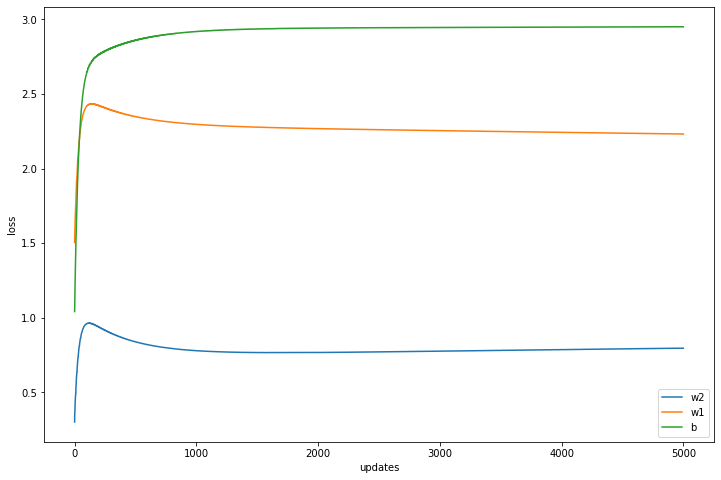

In [136]:
# initial value of the parameters (chosen randomly)
w2 = .3
w1 = 1.5
b = 1
num_epochs = 500
learning_rate = 0.01
w2_list = []
w1_list = []
b_list = []
L_list = []

# Before training, print value for x=4
print("Before learning: f({}) = {}".format(4, forward(4)))

# Learning loop
for epoch in range(num_epochs):
    for x_val, y_val in zip(x_data, y_data): # take each example
        grad_w2 = gradient(x_val, y_val, 0)
        grad_w1 = gradient(x_val, y_val, 1)
        grad_b = gradient(x_val, y_val, 2)
        w2 = w2 - learning_rate * grad_w2
        w1 = w1 - learning_rate * grad_w1
        b = b - learning_rate * grad_b
        #print("\tgradient at ({},{}) = {}".format(x_val, y_val, grad_w2))
        l = cost(x_val, y_val)
        L_list.append(l)
        w2_list.append(w2)
        w1_list.append(w1)
        b_list.append(b)
        
    #print("After epoch:", epoch, "w2=", w2, "w1=", w1, "b=", b, "loss=", l)

print("After learning: f({}) = {}".format(4, forward(4)))
plt.figure(figsize=(12,8))
plt.plot(w2_list, label="w2")
plt.plot(w1_list, label="w1")
plt.plot(b_list, label="b")
#plt.plot(L_list, label="cost")
plt.xlabel("updates")
plt.ylabel("loss")
plt.legend()
plt.show()

In [137]:
# The Neural Network model:
N1 = 10
N2 = 10
N3 = 10

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, N1)
        self.fc2 = nn.Linear(N1, N2)
        self.fc3 = nn.Linear(N2, N3)
        self.fc4 = nn.Linear(N3, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

net = Net()
# The criteria to optimize (cost function)
criterion = MSELoss()
# PyTorch proposes several opmization algorithms. SGD is a good starting choice.
optimizer = torch.optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

Prediction: [3.2, 6.0, 3.7, 5.6, 4.2, 4.9, 5.2, 3.4, 4.0, 4.5]
Expected: [3.21, 6.0, 3.69, 5.61, 4.25, 4.89, 5.24, 3.44, 3.96, 4.5600000000000005]


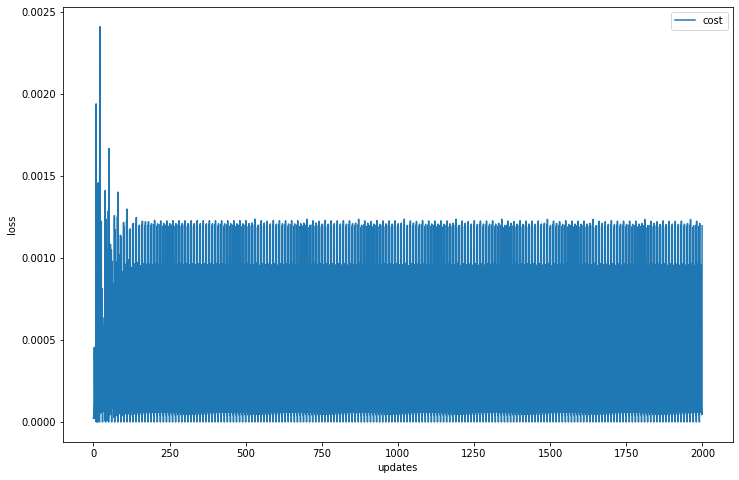

In [139]:
# define the number of epochs and the data set size
nb_epochs = 200
data_size = len(x_data)
loss_list = []
for epoch in range(nb_epochs):    
    epoch_loss = 0;
    
    for ix in range(data_size):
        y_pred = net(Variable(Tensor([x_data[ix]])))
    
        loss = criterion(y_pred, Variable(Tensor([y_data[ix]]), requires_grad=False))
        
        epoch_loss = loss.data.item()
    
        optimizer.zero_grad()
    
        loss.backward()
        optimizer.step()
        loss_list.append(epoch_loss)

    #print("Epoch: {} Loss: {}".format(epoch, epoch_loss))

net.eval()
test_data = x_data
y_preds = []
for i in test_data:
  prediction = net(Variable(Tensor([i])))
  y_preds.append(round(prediction.data.item(),1))
print("Prediction: {}".format(y_preds))
print("Expected: {}".format(y_data))

plt.figure(figsize=(12,8))
plt.plot(loss_list, label="cost")
plt.xlabel("updates")
plt.ylabel("loss")
plt.legend()
plt.show()